In [16]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 3.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/11.1 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 4.3 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.1 MB 4.4 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 4.4 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 4.4 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 4.4 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.1 MB 4.4 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 4.3 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.1 MB 4.3 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 4.3 MB/s eta 0:00:01
   --

In [12]:
from ucimlrepo import fetch_ucirepo 
   
mice_protein_expression = fetch_ucirepo(id=342) 
   
X = mice_protein_expression.data.features 
y = mice_protein_expression.data.targets 



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
# odstranuvanje na prvata i poslednite 4 koloni
X = X.iloc[:, 1:-4]

#odstranuvanje na NaNs vo sprotivno ne funkcionira PCA
X=X.dropna()



In [20]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)
# go sveduvame na 2 promenlivi
X2pca=pca2.fit_transform(X)
#go sveduvame na 3 promenlivi
X3pca=pca3.fit_transform(X)



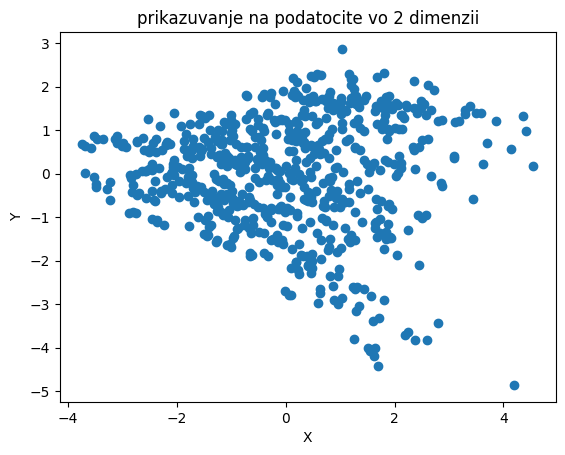

In [31]:
import matplotlib.pyplot as plt

plt.scatter(X2pca[:, 0], X2pca[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('prikazuvanje na podatocite vo 2 dimenzii')
plt.show()


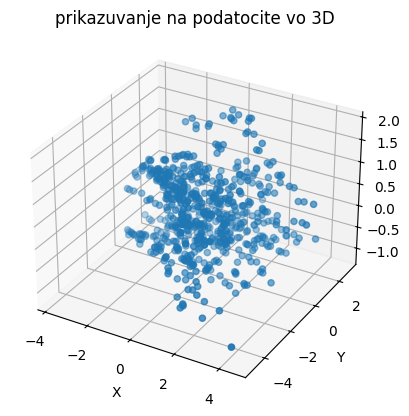

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  


ax.scatter(X3pca[:, 0], X3pca[:, 1], X3pca[:, 2])  


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('prikazuvanje na podatocite vo 3D')

plt.show()

In [25]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 4.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 4.4 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.1 MB 4.5 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 4.5 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 4.5 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 4.5 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.2 MB 4.8 MB/s eta 0:00:01
   --------------------------------- ------ 1.8/2.2 MB 4.6 MB/s eta 0:00:01
   -----------------------

In [7]:
!pip install ucimlrepo

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 2.0 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.5 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.8/11.5 MB 2.5 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.5 MB 2.7 MB/s eta 0:00:04
   ----------- ---------------------------- 3.4/11.5 MB 3.0 MB/s eta 0:00:03
   -------------- ------------------------- 4.2/11.5 MB 3.2 MB/s eta 0:00:03
   ------------------ --------------------- 5.2/11.5 MB 3.4 MB/s eta 0:00:02
   --------------------- ------------------ 6.3/11.5 MB 3.5 MB/s eta 0:00:02
   ------------------------ --------------- 7.1/11.5 MB 3.6 MB/s eta 0:00:02
   ---------------------------- ----------- 8.1/11.5 MB 3.7 MB/s eta 0:00:01
   ------------------------------- -------- 8.9/11.5 MB 3.7 MB/s eta 0:00:01
   ----------

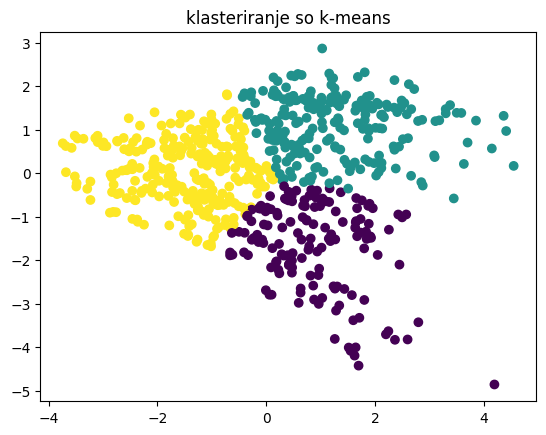

In [40]:
# so k-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# klasteriranje vo 3 klasteri
kmeans = KMeans(n_clusters=3, random_state=0) 
kmeans_labels = kmeans.fit_predict(X2pca)

# Plotting the clusters (2D)
plt.scatter(X2pca[:, 0], X2pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('klasteriranje so k-means')
plt.show()


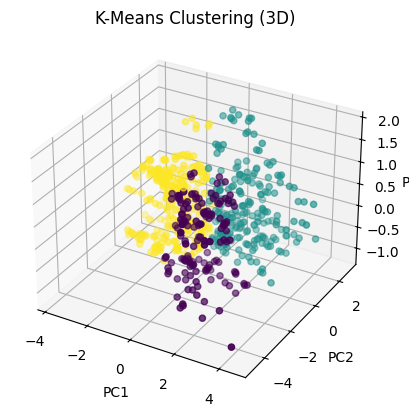

In [42]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X3pca)  # X3pca should be 3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D clusters
ax.scatter(X3pca[:, 0], X3pca[:, 1], X3pca[:, 2], c=kmeans_labels, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('k-means klasteriranje samo vo 3d')

plt.show()

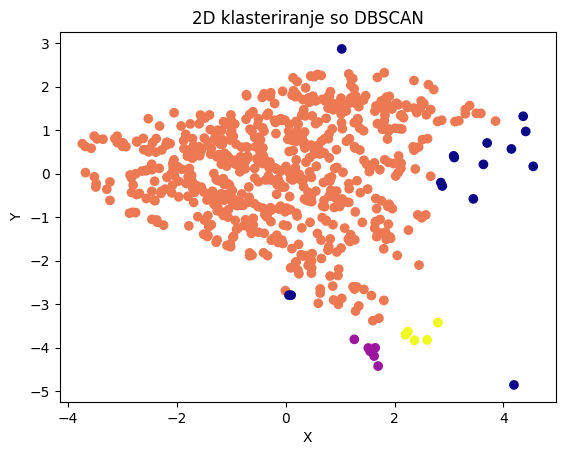

In [45]:
#klasteriranje so DBSCAN vo 2d
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X2pca)

plt.scatter(X2pca[:, 0], X2pca[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('2D klasteriranje so DBSCAN')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


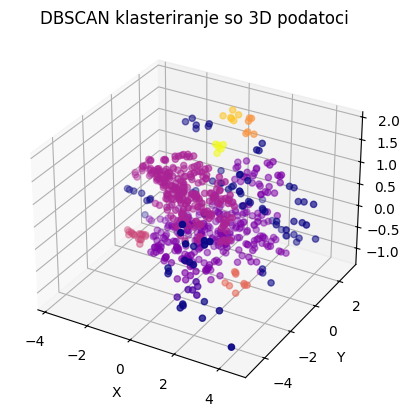

In [46]:
# DBSCAN so 3d podatoci

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust `eps` and `min_samples` based on your data
dbscan_labels = dbscan.fit_predict(X3pca)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the DBSCAN clusters (colored by labels)
ax.scatter(X3pca[:, 0], X3pca[:, 1], X3pca[:, 2], c=dbscan_labels, cmap='plasma')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('DBSCAN klasteriranje so 3D podatoci')

plt.show()